In [57]:
#importing necessary tools, to manipulate the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
from scipy import stats
df = pd.read_csv("China_largest_companies.csv")
df

,Global Rank\t,Company\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
0,1,ICBC,134.8,37.8,2813.5,237.3
1,2,China Construction Bank,113.1,30.6,2241.0,202.0
2,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8
3,9,PetroChina,308.9,18.3,347.8,261.2
4,11,Bank of China,98.1,22.1,2033.8,131.7
...,...,...,...,...,...,...
130,1866,Qinghai Salt Lake,15.2,0.4,4.7,6.8
131,1906,Inner Mongolia Baotou Steel,6.8,0.1,7.9,6.4
132,1916,Shanghai Material Trading,12.8,0.0,1.5,0.3
133,1944,Tongling Nonferrous Metals,12.2,0.1,5.9,3.9


In [58]:
#info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank	             135 non-null    int64  
 1   Company	                 135 non-null    object 
 2   Sales ($billion)	        135 non-null    float64
 3   Profits ($billion)	      135 non-null    float64
 4   Assets ($billion)	       135 non-null    float64
 5   Market Value ($billion)  135 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [59]:
#columns, rows
df.shape

(135, 6)

In [60]:
#checking for duplicates in companies
df["Company\t"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
130    False
131    False
132    False
133    False
134    False
Name: Company\t, Length: 135, dtype: bool

In [61]:
#Grouping
#Companies in the top 10 global rank
Top10_in_Global_Rank = df.groupby(["Global Rank\t", "Company\t", "Market Value ($billion)"])["Company\t"].count().reset_index(name="count")
Top10__in_Global_Rank = Top10_in_Global_Rank.set_index("Global Rank\t")
Top10_in_Global_Rank = Top10_in_Global_Rank.sort_values("Global Rank\t", ascending = True)
Top10_in_Global_Rank.head(4)

,Global Rank\t,Company\t,Market Value ($billion),count
0,1,ICBC,237.3,1
1,2,China Construction Bank,202.0,1
2,8,Agricultural Bank of China,150.8,1
3,9,PetroChina,261.2,1


In [62]:
#Top ten profitable companies
Top10_Profitable = df.groupby(["Company\t", "Profits ($billion)\t", "Sales ($billion)\t", "Market Value ($billion)"])["Market Value ($billion)"].count().reset_index(name="count")
Top10_Profitable = Top10_Profitable.sort_values("Profits ($billion)\t", ascending =False)
Top10_Profitable = Top10_Profitable.set_index("Profits ($billion)\t")
Top10_Profitable.head(10)

,Company\t,Sales ($billion)\t,Market Value ($billion),count
Profits ($billion),,,,
37.8,ICBC,134.8,237.3,1
30.6,China Construction Bank,113.1,202.0,1
23.0,Agricultural Bank of China,103.0,150.8,1
22.1,Bank of China,98.1,131.7,1
18.3,PetroChina,308.9,261.2,1
10.1,Sinopec-China Petroleum,411.7,106.9,1
9.4,Bank of Communications,43.5,56.7,1
7.7,China Shenhua Energy,39.7,70.8,1
7.3,China Merchants Bank,28.4,44.1,1


In [63]:
#Top ten companies by sales
Top10_by_sales = df.groupby(["Company\t", "Profits ($billion)\t","Sales ($billion)\t", "Market Value ($billion)"])["Sales ($billion)\t"].count().reset_index(name="count")
Top10_by_sales = Top10_by_sales.sort_values("Sales ($billion)\t", ascending=False)
Top10_by_sales = Top10_by_sales.set_index("Sales ($billion)\t")
Top10_by_sales.head(10)

,Company\t,Profits ($billion)\t,Market Value ($billion),count
Sales ($billion),,,,
411.7,Sinopec-China Petroleum,10.1,106.9,1
308.9,PetroChina,18.3,261.2,1
134.8,ICBC,37.8,237.3,1
113.1,China Construction Bank,30.6,202.0,1
103.0,Agricultural Bank of China,23.0,150.8,1
98.1,Bank of China,22.1,131.7,1
76.7,China Railway Group,1.2,10.2,1
76.7,China State Construction,2.2,16.9,1
75.0,SAIC Motor,3.3,26.7,1


In [64]:
#Top ten companies by market value
Top10_by_Market_Value = df.groupby(["Company\t", "Market Value ($billion)", "Profits ($billion)\t", "Assets ($billion)\t"])["Assets ($billion)\t"].count().reset_index(name="count")
Top10_by_Market_Value = Top10_by_Market_Value.set_index("Market Value ($billion)")
Top10_by_Market_Value = Top10_by_Market_Value.sort_values("Market Value ($billion)", ascending =False)
Top10_by_Market_Value.head(10)

,Company\t,Profits ($billion)\t,Assets ($billion)\t,count
Market Value ($billion),,,,
261.2,PetroChina,18.3,347.8,1
237.3,ICBC,37.8,2813.5,1
202.0,China Construction Bank,30.6,2241.0,1
150.8,Agricultural Bank of China,23.0,2124.2,1
131.7,Bank of China,22.1,2033.8,1
106.9,Sinopec-China Petroleum,10.1,200.0,1
79.9,China Life Insurance,1.8,304.6,1
70.8,China Shenhua Energy,7.7,70.2,1
65.0,Tencent Holdings,2.0,12.1,1


In [65]:
#Top ten companies by assets
Top10_by_Assets = df.groupby(["Company\t", "Assets ($billion)\t", "Profits ($billion)\t", "Market Value ($billion)"])["Market Value ($billion)"].count().reset_index(name="count")
Top10_by_Assets = Top10_by_Assets.sort_values("Assets ($billion)\t", ascending=False)
Top10_by_Assets = Top10_by_Assets.set_index("Assets ($billion)\t")
Top10_by_Assets.head(10)

,Company\t,Profits ($billion)\t,Market Value ($billion),count
Assets ($billion),,,,
2813.5,ICBC,37.8,237.3,1
2241.0,China Construction Bank,30.6,202.0,1
2124.2,Agricultural Bank of China,23.0,150.8,1
2033.8,Bank of China,22.1,131.7,1
846.4,Bank of Communications,9.4,56.7,1
547.0,China Merchants Bank,7.3,44.1,1
515.5,China Minsheng Banking,6.1,43.9,1
504.5,Shanghai Pudong Development,5.4,31.6,1
474.7,China Citic Bank,4.9,32.5,1


# Statistics

In [66]:
df.describe()

,Global Rank\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,972.792593,22.403704,2.040000,127.399259,20.465185
std,554.339800,47.836466,5.253573,405.949323,39.244472
min,1.000000,0.800000,-1.500000,1.300000,0.200000
25%,549.500000,4.900000,0.400000,8.350000,5.400000
50%,991.000000,10.300000,0.600000,15.500000,8.700000
75%,1439.500000,18.000000,1.300000,41.250000,14.800000
max,1948.000000,411.700000,37.800000,2813.500000,261.200000


In [67]:
#correlation
corr = df.corr()
corr

,Global Rank\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
Global Rank\t,1.000000,-0.471629,-0.502138,-0.466390,-0.540462
Sales ($billion)\t,-0.471629,1.000000,0.590118,0.409830,0.725870
Profits ($billion)\t,-0.502138,0.590118,1.000000,0.945901,0.923257
Assets ($billion)\t,-0.466390,0.409830,0.945901,1.000000,0.801346
Market Value ($billion),-0.540462,0.725870,0.923257,0.801346,1.000000


C:\Users\PC\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


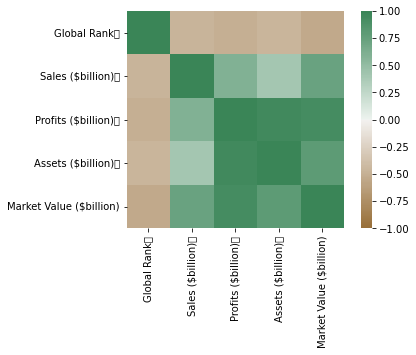

In [68]:
#Heatmap, visualizing correlation.
axis_corr = sns.heatmap(corr, vmin = -1, vmax=1, center = 0, cmap = sns.diverging_palette(50, 500, n=500), square=True)
axis_corr


# Linear regression

In [80]:
#Linear regression for profits and marker value
x = df["Profits ($billion)\t"]
y = df["Market Value ($billion)"]

slope, intercept, r, p, std_err = stats.linregress(x, y)
slope, intercept, r, p, std_err

(73.09081809342625,
 -21.70600965133029,
 0.9459012008859864,
 7.022370745232422e-67,
 2.173929375242475)

Text(0, 0.5, 'Market value in $Billions')

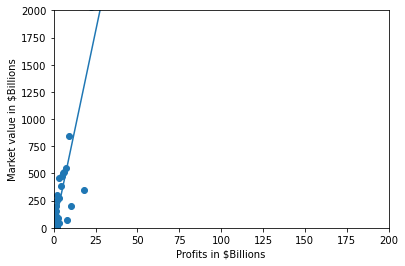

In [82]:
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel("Profits in $Billions")
plt.ylabel("Market value in $Billions")

# Visualization

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


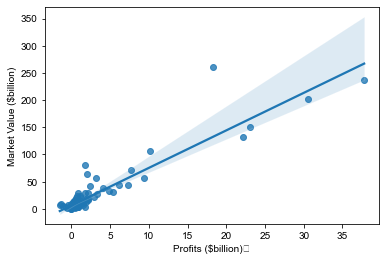

In [90]:
sns.regplot(x = df["Profits ($billion)\t"], y=df["Market Value ($billion)"])
sns.set(style="darkgrid")